# IMPORTANDO AS BIBLIOTECAS

In [15]:
from os import path, listdir
from pathlib import Path
from inspect import stack

In [16]:
import pandas as pd

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# DEFININDO OPÇÕES GLOBAIS

In [18]:
pd.set_option('display.max_columns', None)

In [19]:
plt.figure(figsize=(12, 8))

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

In [20]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

# FUNÇÕES ÚTEIS

In [21]:
def get_files_directory(path_dir, specific_type=None):

    """

        FUNÇÃO PARA OBTER ARQUIVOS DE UM DIRETÓRIO.

        É POSSÍVEL ENVIAR UM FORMATO ESPECÍFICO PARA
        FILTRO DO FORMATO DE ARQUIVO DESEJADO.
        EX: OBTER APENAS XLSX

        # Arguments
            path_dir                   - Required : Diretório analisado (String)
            specific_type              - Optional : Lista com os formatos desejados (List)

        # Returns
            list_files                 - Required : Arquivos do diretório (List)

    """

    # INICIANDO A VARIÁVEL QUE ARMAZENARÁ TODOS OS ARQUIVOS DO DIRETÓRIO
    list_files = []

    # OBTENDO TODOS OS ARQUIVOS
    try:

        # VERIFICANDO SE É DIRETÓRIO
        if path.isdir(path_dir):

            # OBTENDO TODOS OS ARQUIVOS EXISTENTES NO ARQUIVO
            list_files = [path.join(path_dir, name) for name in listdir(path_dir)]

            # VERIFICANDO SE UMA EXTENSÃO ESPECÍFICA FOI DEFINIDA
            if specific_type:

              # VERIFICANDO SE A EXTENSÃO É DO TIPO TUPLE/LIST
              if not isinstance(specific_type, (tuple, list)):
                  specific_type = [specific_type]

              print("FILTRANDO PARA AS EXTENSÕES: {}".format(specific_type))

              # FILTRANDO OS VALORES DA LISTA
              list_files = [arq for arq in list_files if (Path(arq).suffix in (specific_type) or str(Path(arq).suffix).replace(".", "") in (specific_type))]

        else:
            list_files = [path_dir]

    except Exception as ex:
        print("ERRO NA FUNÇÃO: {} - {}".format(stack()[0][3], ex))

    return list_files

# VARIÁVEIS GLOBAIS

In [22]:
# DIRETÓRIO ONDE ESTÃO OS DADOS
data_dir = 'data/DATASETS_GHCN_MONTHLY'

# FORMATO DESEJADO
specific_type = "csv"

In [23]:
# NOME DA COLUNA QUE SERÁ CRIADA PARA A INFORMAÇÃO DE LOCALIZAÇÕES
name_column_location = "LOCATION_BRAZIL_STATE"

# OBTENDO OS DADOS DO GHCN-MONTLY

> Global Historical Climatology Network - Monthly Temperature, Version 4
(NOAA GHCN v4)

In [24]:
# INICIANDO O DATAFRAME
df = pd.DataFrame()

# PERCORRENDO TODOS OS ARQUIVOS QUE ESTÃO NO DIRETÓRIO
for file in get_files_directory(data_dir,
                                specific_type=specific_type):

  # OBTENDO O NOME DO ESTADO (O NOME ESTÁ NO NOME DO ARQUIVO)
  state = Path(file).stem.replace("station_", "").upper()

  if path.isfile(file):

    print("REALIZANDO A LEITURA - {}".format(file))

    # REALIZANDO A LEITURA DO DATAFRAME AUXILIAR
    df_aux = pd.read_csv(file, sep=",")

    df_aux[name_column_location] = state

    # ADICIONANDO O RESULTAOD DA LEITURA AO DATAFRAME GLOBAL
    df = pd.concat([df, df_aux], ignore_index=True, axis=0)

REALIZANDO A LEITURA - data/DATASETS_GHCN_MONTHLY/station_belem.csv
REALIZANDO A LEITURA - data/DATASETS_GHCN_MONTHLY/station_macapa.csv
REALIZANDO A LEITURA - data/DATASETS_GHCN_MONTHLY/station_curitiba.csv
REALIZANDO A LEITURA - data/DATASETS_GHCN_MONTHLY/station_vitoria.csv
REALIZANDO A LEITURA - data/DATASETS_GHCN_MONTHLY/station_goiania.csv
REALIZANDO A LEITURA - data/DATASETS_GHCN_MONTHLY/station_rio.csv
REALIZANDO A LEITURA - data/DATASETS_GHCN_MONTHLY/station_manaus.csv
REALIZANDO A LEITURA - data/DATASETS_GHCN_MONTHLY/station_recife.csv
REALIZANDO A LEITURA - data/DATASETS_GHCN_MONTHLY/station_fortaleza.csv
REALIZANDO A LEITURA - data/DATASETS_GHCN_MONTHLY/station_sao_luiz.csv
REALIZANDO A LEITURA - data/DATASETS_GHCN_MONTHLY/station_sao_paulo.csv
REALIZANDO A LEITURA - data/DATASETS_GHCN_MONTHLY/station_salvador.csv


In [25]:
df.head()

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,D-J-F,M-A-M,J-J-A,S-O-N,metANN,LOCATION_BRAZIL_STATE
0,1961,26.43,25.53,25.88,26.07,26.31,26.64,26.77,26.72,26.62,26.46,26.50,26.51,26.19,26.09,26.71,26.53,26.38,BELEM
1,1962,26.30,26.06,26.15,26.04,26.83,26.74,26.71,26.94,26.87,26.80,26.68,26.91,26.29,26.34,26.80,26.78,26.55,BELEM
2,1963,26.25,26.03,26.02,26.42,27.17,26.94,26.93,26.98,26.96,26.85,27.06,26.24,26.40,26.54,26.95,26.96,26.71,BELEM
3,1964,25.70,25.52,25.41,25.75,26.55,26.91,27.16,27.34,27.32,999.90,999.90,999.90,25.82,25.90,27.14,999.90,26.39,BELEM
4,1965,999.90,999.90,999.90,999.90,999.90,999.90,999.90,999.90,999.90,999.90,999.90,999.90,999.90,999.90,999.90,999.90,999.90,BELEM


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 757 entries, 0 to 756
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   YEAR                   757 non-null    int64  
 1   JAN                    757 non-null    float64
 2   FEB                    757 non-null    float64
 3   MAR                    757 non-null    float64
 4   APR                    757 non-null    float64
 5   MAY                    757 non-null    float64
 6   JUN                    757 non-null    float64
 7   JUL                    757 non-null    float64
 8   AUG                    757 non-null    float64
 9   SEP                    757 non-null    float64
 10  OCT                    757 non-null    float64
 11  NOV                    757 non-null    float64
 12  DEC                    757 non-null    float64
 13  D-J-F                  757 non-null    float64
 14  M-A-M                  757 non-null    float64
 15  J-J-A 

In [27]:
df.describe()

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,D-J-F,M-A-M,J-J-A,S-O-N,metANN
count,757.000000,757.000000,757.000000,757.000000,757.000000,757.000000,757.000000,757.000000,757.000000,757.000000,757.000000,757.000000,757.000000,757.000000,757.000000,757.000000,757.000000,757.000000
mean,1985.652576,158.684861,163.885020,162.350291,169.546671,158.404808,155.274742,152.469260,150.430383,153.591083,163.130978,175.024531,175.269802,148.372140,148.849683,144.986552,152.771532,156.463250
std,22.642016,334.064010,339.423043,338.194299,346.249904,336.062650,333.548049,330.855333,327.817637,330.413369,339.739246,351.145525,351.037725,322.793752,324.556100,322.140742,328.820817,333.067957
min,1910.000000,19.510000,20.290000,19.110000,16.850000,14.490000,12.190000,12.080000,13.410000,14.120000,15.480000,17.760000,19.470000,20.520000,17.540000,13.110000,17.000000,17.050000
25%,1972.000000,25.740000,25.800000,25.690000,25.100000,23.640000,22.600000,22.170000,22.660000,23.270000,24.320000,24.930000,25.410000,25.690000,24.960000,22.530000,24.190000,24.480000
50%,1988.000000,26.920000,26.890000,26.760000,26.490000,26.090000,25.320000,24.760000,25.160000,26.520000,26.620000,26.890000,27.050000,26.920000,26.420000,24.860000,26.590000,26.180000
75%,2004.000000,27.910000,27.960000,27.660000,27.600000,27.700000,27.700000,27.690000,28.220000,28.680000,28.760000,28.660000,28.310000,27.850000,27.470000,27.800000,28.600000,27.810000
max,2019.000000,999.900000,999.900000,999.900000,999.900000,999.900000,999.900000,999.900000,999.900000,999.900000,999.900000,999.900000,999.900000,999.900000,999.900000,999.900000,999.900000,999.900000


# PRÉPROCESSAMENTO

## REMOVENDO COLUNAS NÃO DESEJADAS

In [ ]:
# REALIZANDO UMA CÓPIA DO DATAFRAME ORIGINAL
df_original = df.copy()

In [ ]:
# REMOVENDO COLUNAS NÃO DESEJADAS
df = df.drop(['D-J-F', 'M-A-M', 'J-J-A', 'S-O-N', 'metANN'], axis=1)

KeyError: ignored

## OBTENDO UMA LINHA PARA CADA VALOR DA SÉRIE TEMPORAL

In [ ]:
df_one_row_per_month = pd.melt(df,
                               id_vars=['YEAR', name_column_location],
                               var_name='MONTH',
                               value_name='TEMPERATURE')

In [ ]:
df_one_row_per_month.head()

,YEAR,LOCATION_BRAZIL_STATE,MONTH,TEMPERATURE
0,1961,VITORIA,JAN,26.09
1,1962,VITORIA,JAN,26.38
2,1963,VITORIA,JAN,27.59
3,1964,VITORIA,JAN,25.28
4,1965,VITORIA,JAN,25.65


## CONVERTENDO 999.9 PARA VALOR NULO

In [ ]:
df_one_row_per_month["TEMPERATURE"] = df_one_row_per_month["TEMPERATURE"].apply(lambda x: None if x == 999.9 else x)

# ANÁLISE EXPLORATÓRIA

Para possuir a maior quantidade de entradas, o foco será na análise com frequência de dados por meses do ano. Portanto removeremos as colunas que contém as médias trimestrais.

In [ ]:
# QUANTIDADE DE ESTADOS DISTINTOS
count_state = df[name_column_location].nunique()
count_state

12

In [ ]:
dict_describe_state = {}

# DESCRIBE POR ESTADO

# PERCORRENDO CADA UM DOS ESTADOS
for state in df[name_column_location].unique():

    # OBTENDO A QUANTIDADE DE DADOS VÁLIDOS
    qtd_rows_valid = len(df_one_row_per_month[((df_one_row_per_month[name_column_location] == state) & (pd.notna(df_one_row_per_month["TEMPERATURE"])))])

    # OBTENDO O ANO MAIS ANTIGO
    year_min = df_one_row_per_month[df_one_row_per_month[name_column_location] == state]["YEAR"].min()

    # OBTENDO O ANO MAIS RECENTE
    year_max = df_one_row_per_month[df_one_row_per_month[name_column_location] == state]["YEAR"].max()

    # SALVANDO EM UM DICT DE DADOS
    dict_describe_state[state] = {"qtd_rows": qtd_rows_valid,
                                  "year_min": year_min,
                                  "year_max": year_max}


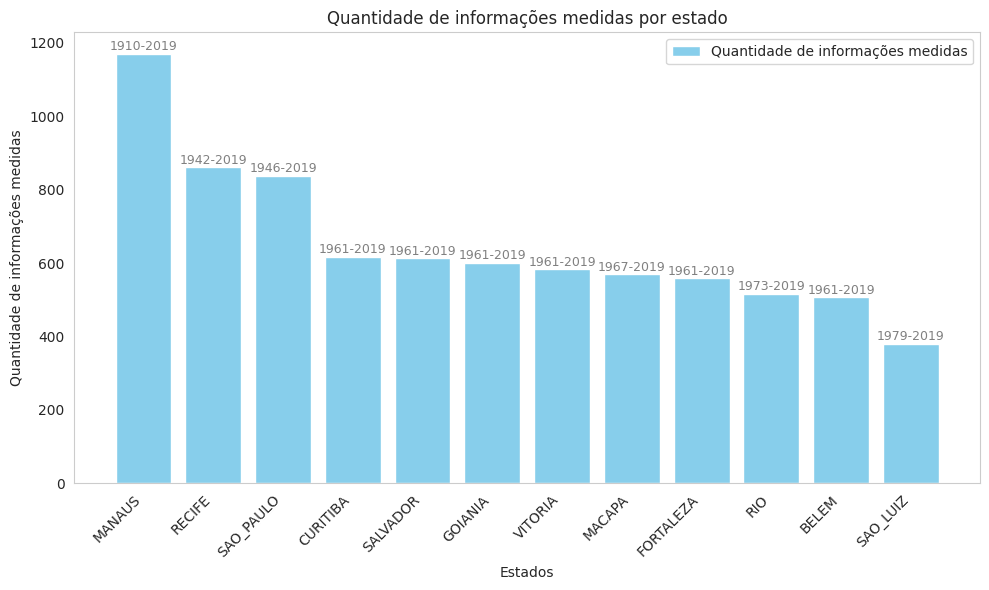

In [ ]:
# Ordenar os estados pelo valor de qtd_rows em ordem decrescente
sorted_states = sorted(dict_describe_state.keys(),
                       key=lambda x: dict_describe_state[x]['qtd_rows'],
                       reverse=True)
qtd_rows = [dict_describe_state[state]['qtd_rows'] for state in sorted_states]
year_min = [dict_describe_state[state]['year_min'] for state in sorted_states]
year_max = [dict_describe_state[state]['year_max'] for state in sorted_states]

plt.figure(figsize=(10, 6))
bars = plt.bar(sorted_states, qtd_rows, color='skyblue', label='Quantidade de informações medidas')
plt.xlabel('Estados')
plt.ylabel('Quantidade de informações medidas')
plt.title('Quantidade de informações medidas por estado')
plt.xticks(rotation=45, ha='right')

for i, bar in enumerate(bars):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 10,
             f'{year_min[i]}-{year_max[i]}',
             ha='center',
             fontsize=9,
             color='gray')

plt.tight_layout()
plt.legend()
plt.grid(False)

plt.savefig("plot_ghcn_montly_qtd_rows_state.png", dpi=300)

plt.show()

## ANALISANDO VALORES FALTANTES

## VISÃO MÊS

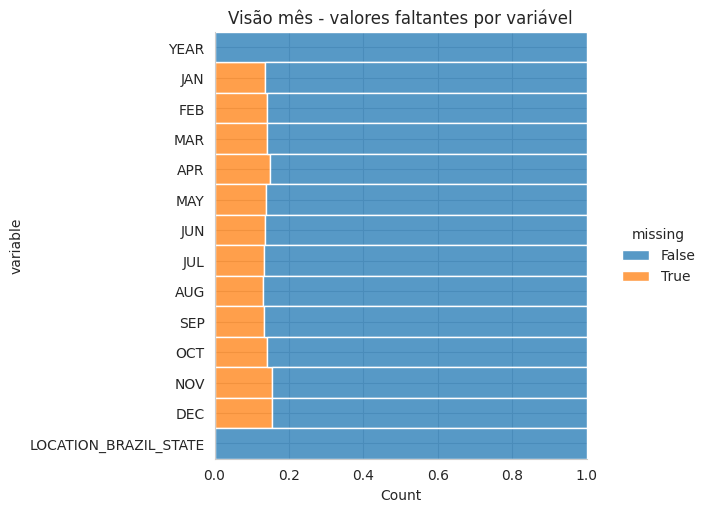

In [ ]:
sns.set_style("whitegrid")

p = sns.displot(
    data=df.eq(999.9).melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill",
    aspect=1.25
)

p.fig.set_dpi(100)

plt.title('Visão mês - valores faltantes por variável')
plt.show()
p.savefig("plot_ghcn_montly_missing_values_i.png")

## VISÃO COLUNA DE TEMPERATURA, INDEPENDENTE DO MÊS

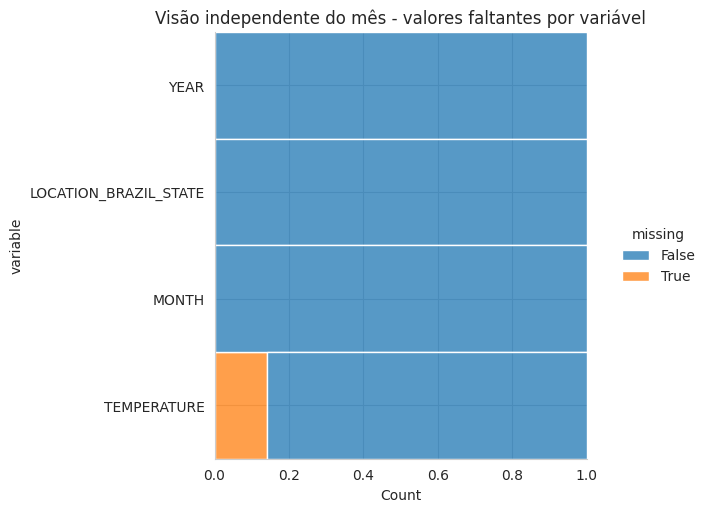

In [ ]:
sns.set_style("whitegrid")

p = sns.displot(
    data=df_one_row_per_month.isna().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill",
    aspect=1.25
)

p.fig.set_dpi(100)

plt.title('Visão independente do mês - valores faltantes por variável')
plt.show()
p.savefig("plot_ghcn_montly_missing_values_ii.png")